### Przekształcenia morfologiczne obrazu

Techniki tego typu umożliwiają wykonanie zaawansowanej analizy kształtu struktur geometrycznych. W tym celu wykorzystywana jest morfologia matematyczna, teoria mnogości, topologia. Właściwości filtrów morfologicznych określane są przez tzw. element strukturalny, wykorzystywany jako ruchome okno. Idea wykorzystania elementu strukturalnego jest zbliżona do koncepcji jądra filtru konwolucyjnego. Podstawowe przekształcenia morfologiczne to **dylatacja** i **erozja**.

**Dylatacja** jest splotem obrazu z elementem strukturalnym, gdzie wartość punktu jest zamieniana na lokalne maksimum wszystkich wartości obejmowanych przez ten element. Inaczej mówiąc pisel w obrazie docelowym jest ustawiany na wartość równą minimalnej wartości piseli w obszarze elementu strukturalnego. W przypadku obrazów wieloodcieniowych operacja ta może być realizowana jako **filtr maksymalny**.

**Erozja** jest operacją odwrotną. Działanie operatora erozji jest równoznaczne z obliczaniem **lokalnego minimum** w obszarze elementu strukturalnego. W przypadku obrazów wieloodcieniowych operacja ta może być realizowana jako **filtr minimalny**.

Ogólnie rzecz biorąc dylatacja rozszerza jasny obszar a erozja powoduje jego zmniejszenie.

In [17]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

Przygotowanie obrazu binarnego

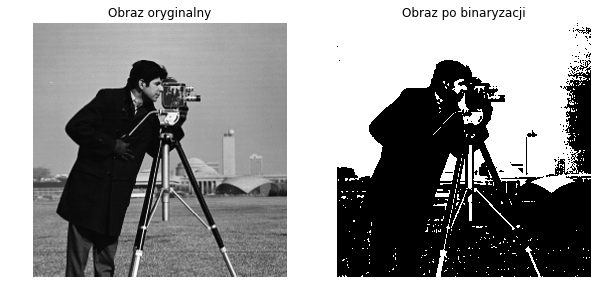

In [18]:
from skimage import data
import cv2

im = data.camera()

th = 150
th, bim = cv2.threshold(im, thresh=th, maxval=255, type=cv2.THRESH_BINARY)

show2imgs(im, bim, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(10,10))

Przykład operacji dylatacji na obrazie binarnym i wieloodcieniowym

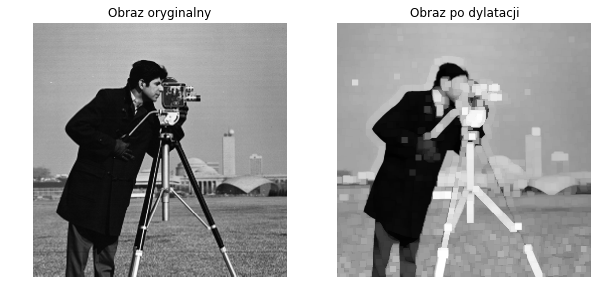

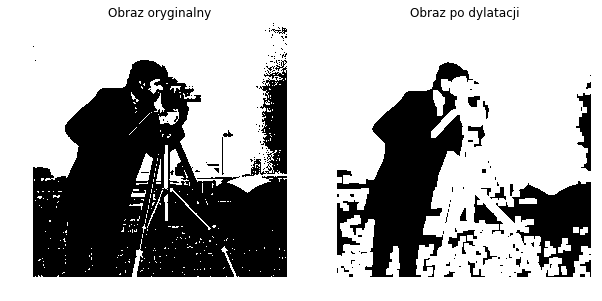

In [19]:
import cv2
import numpy as np

kernel = np.ones((3,3),np.uint8)

dilateGray = cv2.dilate(im, kernel=kernel, iterations=5)
dilateBin = cv2.dilate(bim, kernel=kernel, iterations=5)

show2imgs(im, dilateGray, title1='Obraz oryginalny', title2='Obraz po dylatacji', size=(10,10))
show2imgs(bim, dilateBin, title1='Obraz oryginalny', title2='Obraz po dylatacji', size=(10,10))

Przykład operacji erozji na obrazie wieloodcieniowym i binarnym

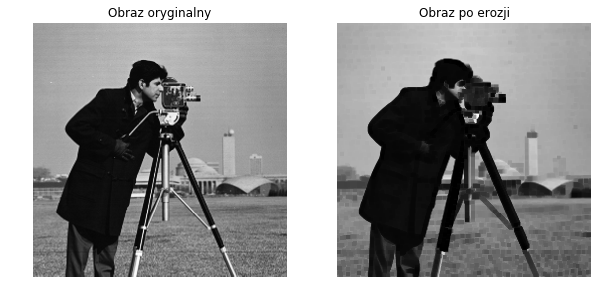

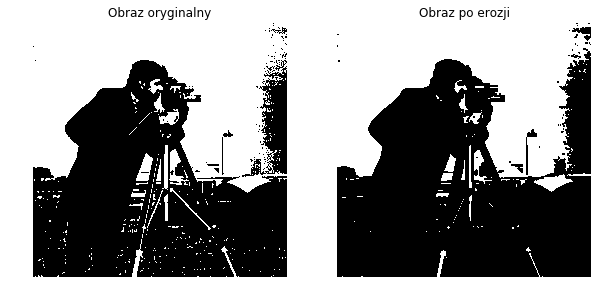

In [20]:
import cv2

kernel = np.ones((3,3),np.uint8)

erodeGray = cv2.erode(im, kernel=kernel, iterations=3)
erodeBin = cv2.erode(bim, kernel=kernel, iterations=1)

show2imgs(im, erodeGray, title1='Obraz oryginalny', title2='Obraz po erozji', size=(10,10))
show2imgs(bim, erodeBin, title1='Obraz oryginalny', title2='Obraz po erozji', size=(10,10))

Złożone operacje morfologiczne: otwarcie (ang. opening) i zamknięcie (ang. closing). Wykonywane są jako proste kombinacje operatorów dylatacji i erozji.

* Otwarcie = erozja + dylatacja.
* Zamknięcie = dylatacja + erozja.

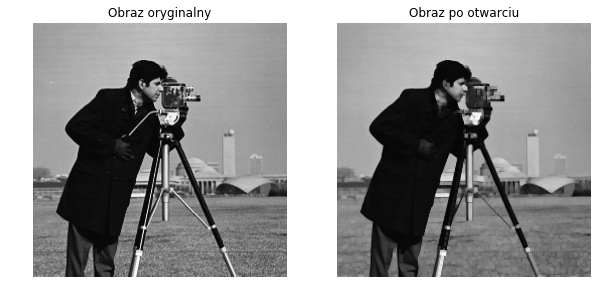

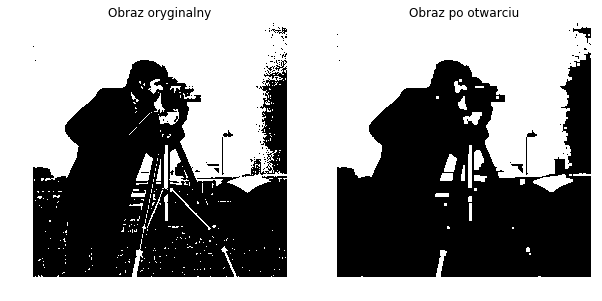

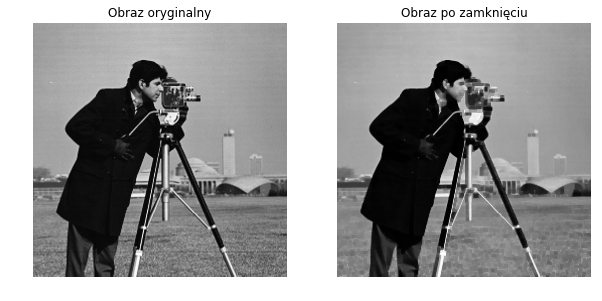

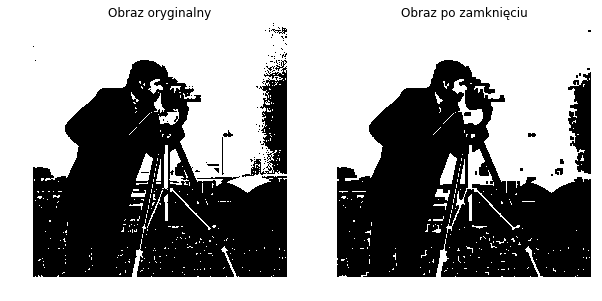

In [21]:
import cv2

element = np.ones((3,3),np.uint8)

# Otwarcie
openingGray = cv2.morphologyEx(im, op=cv2.MORPH_OPEN, kernel=element, iterations=2)
openingBin = cv2.morphologyEx(bim, op=cv2.MORPH_OPEN, kernel=element, iterations=2)

show2imgs(im, openingGray, title1='Obraz oryginalny', title2='Obraz po otwarciu', size=(10,10))
show2imgs(bim, openingBin, title1='Obraz oryginalny', title2='Obraz po otwarciu', size=(10,10))

# Zamknięcie
closingGray = cv2.morphologyEx(im, op=cv2.MORPH_CLOSE, kernel=element, iterations=2)
closingBin = cv2.morphologyEx(bim, op=cv2.MORPH_CLOSE, kernel=element, iterations=2)

show2imgs(im, closingGray, title1='Obraz oryginalny', title2='Obraz po zamknięciu', size=(10,10))
show2imgs(bim, closingBin, title1='Obraz oryginalny', title2='Obraz po zamknięciu', size=(10,10))

#### Gradient morfologiczny

Złożony operator definiowany jako: *gradient(src) = dilate(src) - erode(src)*. W przypadku obrazów wieloodcieniowych wartośc operatora okresla szybkość zmiany jasności obrazu.

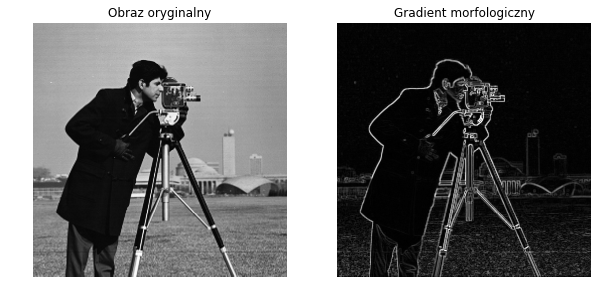

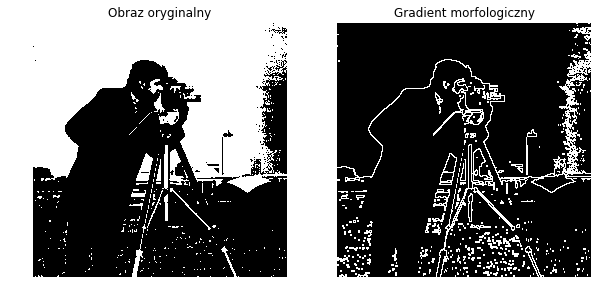

In [22]:
import cv2

element = np.ones((3,3),np.uint8)

# Gradient morfologiczny
gradientGray = cv2.morphologyEx(im, op=cv2.MORPH_GRADIENT, kernel=element, iterations=1)
gradientBin = cv2.morphologyEx(bim, op=cv2.MORPH_GRADIENT, kernel=element, iterations=1)

show2imgs(im, gradientGray, title1='Obraz oryginalny', title2='Gradient morfologiczny', size=(10,10))
show2imgs(bim, gradientBin, title1='Obraz oryginalny', title2='Gradient morfologiczny', size=(10,10))

#### Operacje TopHat i BlackHat

Za pomocą tych operacji można dokonywać ekstrakcji odpowiednio jaśniejszych lub ciemniejszych obszarów w stosunku do najbliższego otoczenia. W praktyce wykorzystuje się te operatory, aby wyizolować części obiektów charakteryzujące się zmianami jasności tylko względem obiektu, z którym są związane.

Złożone operacje definiowane jako:
* *TopHat(src) = src - opening(src)*
* *BlackHat(src) = closing(src) - src*

TopHat odkrywa obszary, które są jaśniejsze niż otoczenie. BlackHat ujawnia obszary, które sa ciemniejsze niż otoczenia. Rozmiar i kształt otoczenia jest definiowany przez element strukturalny.

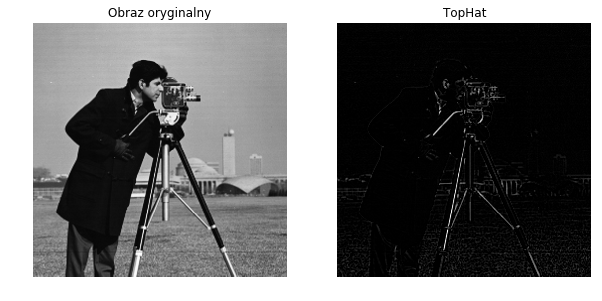

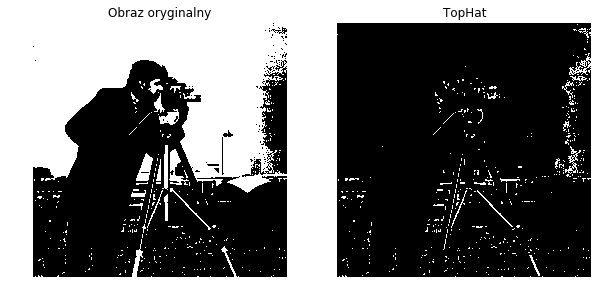

In [23]:
import cv2

element = np.ones((5,5),np.uint8)

# Gradient morfologiczny: MORPH_TOPHAT, MORPH_BLACKHAT
tophatGray = cv2.morphologyEx(im, op=cv2.MORPH_TOPHAT, kernel=element, iterations=1)
tophatBin = cv2.morphologyEx(bim, op=cv2.MORPH_TOPHAT, kernel=element, iterations=1)

show2imgs(im, tophatGray, title1='Obraz oryginalny', title2='TopHat', size=(10,10))
show2imgs(bim, tophatBin, title1='Obraz oryginalny', title2='TopHat', size=(10,10))

#### Operacje morfologiczne z wykorzystaniem biblioteki **skimage**

(344, 549, 3) uint8


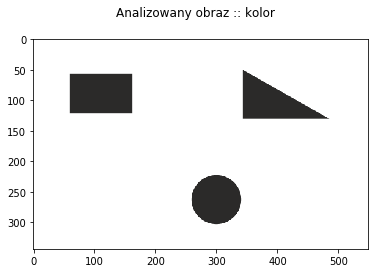

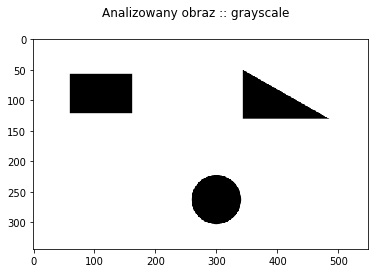

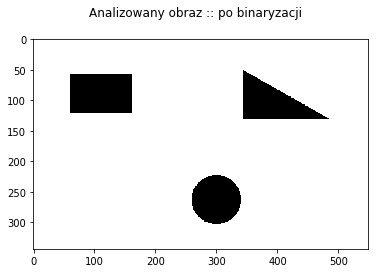

False


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage import exposure, filters


path = './'

figures = io.imread(path + 'pattern1.png')
print(figures.shape, figures.dtype)

plt.imshow(figures)
plt.axis('on')
plt.suptitle('Analizowany obraz :: kolor')
plt.show()

image = rgb2gray(figures)

plt.imshow(image, cmap='gray')
plt.axis('on')
plt.suptitle('Analizowany obraz :: grayscale')
plt.show()

th = filters.threshold_otsu(image)
binary = image > th
plt.imshow(binary, cmap='gray')
plt.axis('on')
plt.suptitle('Analizowany obraz :: po binaryzacji')
plt.show()

print(binary[100,100])

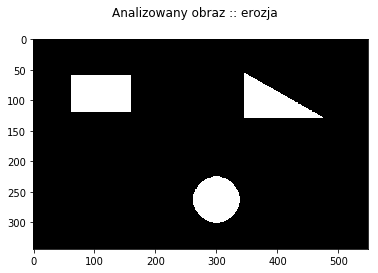

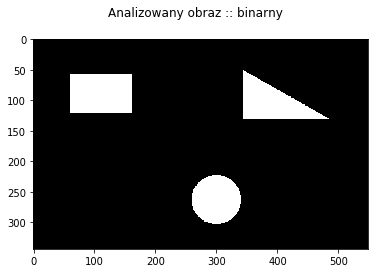

False False
[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


In [25]:
from skimage.morphology import binary_erosion, binary_dilation, square, disk, diamond, star
from skimage.util import invert

binary = invert(binary)

erode = binary_erosion(np.copy(binary), square(5))

plt.imshow(erode, cmap='gray')
plt.axis('on')
plt.suptitle('Analizowany obraz :: erozja')
plt.show()

plt.imshow(binary, cmap='gray')
plt.axis('on')
plt.suptitle('Analizowany obraz :: binarny')
plt.show()

print(binary[150,150], erode[150,150])

es = diamond(2)
print(es)

2139
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
0.1652564705882353 True


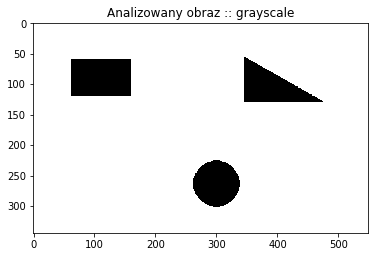

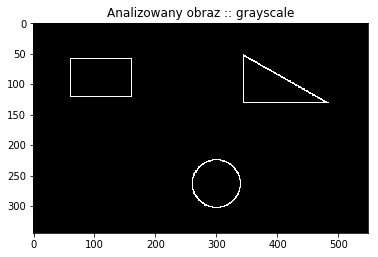

In [26]:
maska = np.logical_not(np.logical_and(binary, erode)) 

diff = np.logical_and(binary, maska)

print(np.sum(diff))
print(diff)

print(image[100,100], erode[100,100])

plt.figure()
plt.imshow(maska, cmap='gray')
plt.axis('on')
plt.title('Analizowany obraz :: grayscale')
plt.show()

plt.figure()
plt.imshow(diff, cmap='gray')
plt.axis('on')
plt.title('Analizowany obraz :: grayscale')
plt.show()

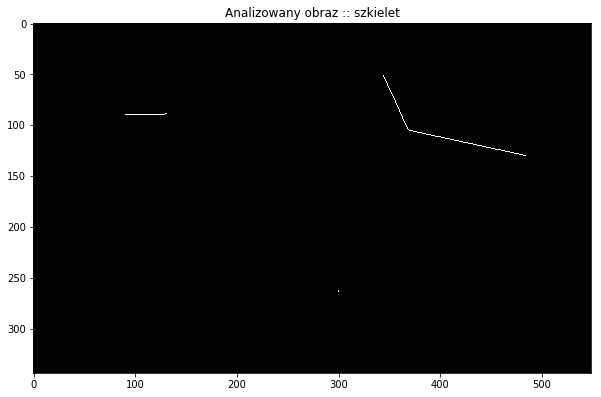

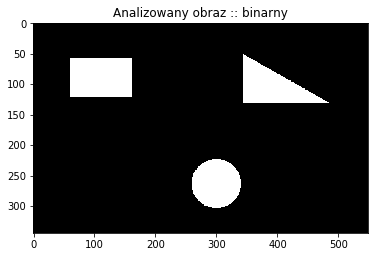

In [27]:
from skimage.morphology import skeletonize

from skimage.util import invert
# skel = skeletonize(invert(binary))
skel = skeletonize(binary)

plt.figure(figsize=(10,10))
plt.imshow(skel, cmap='gray')
plt.axis('on')
plt.title('Analizowany obraz :: szkielet')
plt.show()

plt.imshow(binary, cmap='gray')
plt.axis('on')
plt.title('Analizowany obraz :: binarny')
plt.show()

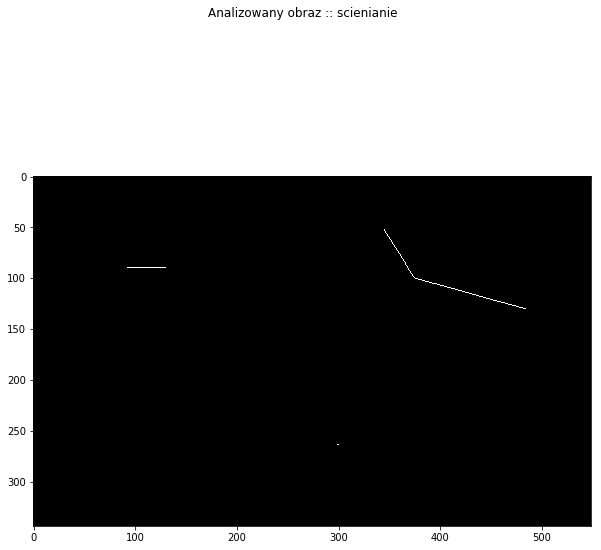

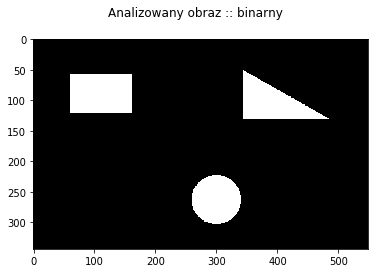

In [28]:
from skimage.morphology import thin, disk

from skimage.util import invert
# thinned = thin(invert(binary))
thinned = thin(binary)

plt.figure(figsize=(10,10))
plt.imshow(thinned, cmap='gray')
plt.axis('on')
plt.suptitle('Analizowany obraz :: scienianie')
plt.show()

plt.imshow(binary, cmap='gray')
plt.axis('on')
plt.suptitle('Analizowany obraz :: binarny')
plt.show()

In [29]:
result = np.mean(skel == thinned)
print(result)

0.9984114881179311


In [30]:
lena = io.imread(path + 'lena.tif')
print(lena.shape, lena.dtype)
lena = rgb2gray(lena)
print(lena.shape, lena.dtype)

plt.imshow(lena, cmap="gray")
plt.axis('on')
plt.suptitle('Analizowany obraz :: kolor')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './lena.tif'

In [ ]:
from skimage.morphology import local_maxima

lm = local_maxima(lena)

plt.imshow(lm, cmap="gray")
plt.axis('on')
plt.suptitle('Analizowany obraz :: kolor')
plt.show()